## Veri İncelemesi (Eksik ve Aykırı Verilerin Tespiti ve Çözümlemesi)
Veriyi incelmek için önce dahil etmemiz gerek. Bunun için de pandas kullanacağız.

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('data.csv')
df = data.copy()

Veriyi incelemeye artık başlayabiliriz.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8136 entries, 0 to 8135
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          8136 non-null   object
 1   district      8136 non-null   object
 2   neighborhood  8136 non-null   object
 3   room          8136 non-null   int64 
 4   living_room   8136 non-null   int64 
 5   area          8136 non-null   int64 
 6   age           8136 non-null   int64 
 7   floor         8136 non-null   int64 
 8   price         8136 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 572.2+ KB


Verisetinde görüldüğü gibi evlerin oda sayısı, bulunduğu kat ve konum gibi fiyatta önemli değişimlere karar verecek 9 column (sütun) var ve 8136 tane veri bulunuyor. Veride NaN (eksik) değerler var mı bakalım. Bunun için görsel açıdan daha fikir vermesi açısından ben 'missingno' kullanıyorum. Siz isterseniz df.isna().sum() kullanıp hangi columnda kaç tane NaN değer var, bakabilirsiniz.

In [9]:
import missingno as msno

<Axes: >

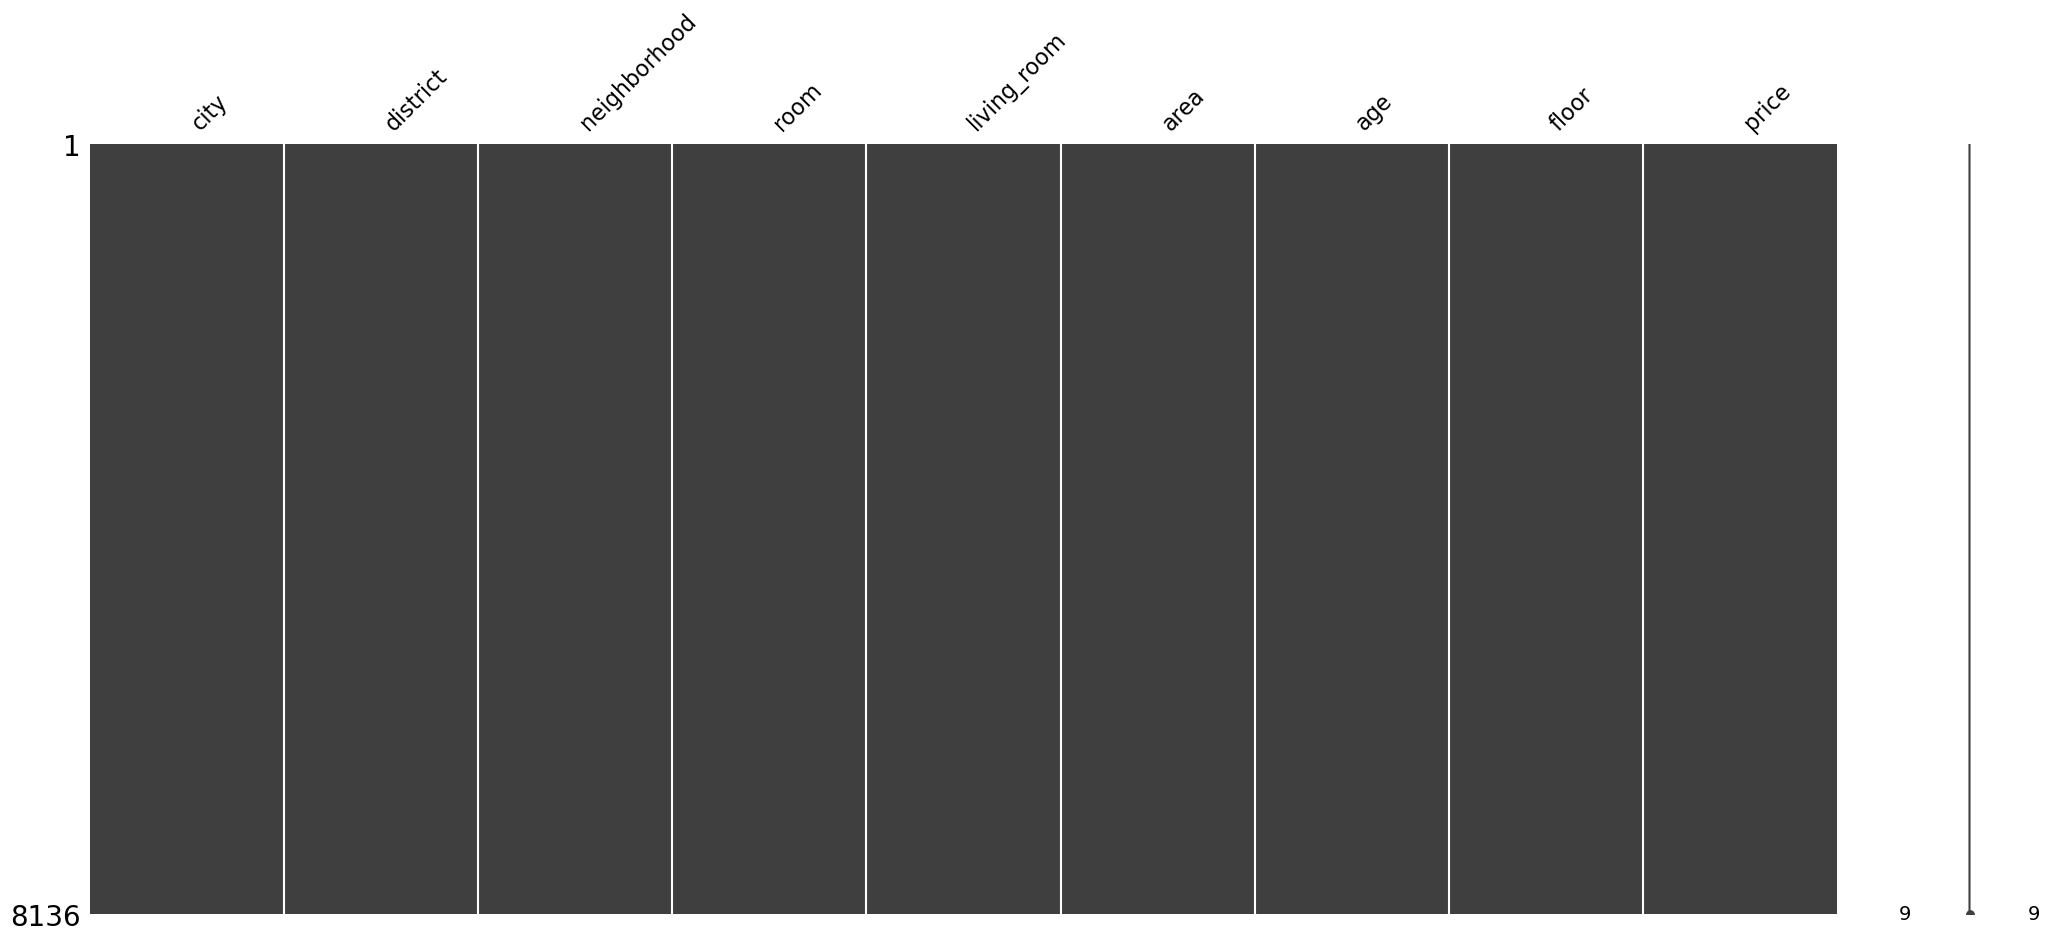

In [10]:
msno.matrix(df)

Gördüğünüz gibi veride manipüle edilmesi veya kaldırılması gereken herhangi bir eksik veri yok. Eksik değerlerle alakalı bir sorunumuz olmadığına göre aykırı değerlere bakalım. Burada farklı bir yola gitmeyi düşünüyorum. İlk önce ev fiyatlarındaki dağılımı merak ettiğim için ayrı bir dağılıma bakmak istiyorum ve bunu veri görselleştirmeden faydalanarak yapıcam. Bu yüzden 'seaborn' modülünü import ediyorum.

In [14]:
import seaborn as sns

Şimdi fiyatların hangi aralıkta yoğunlaşıp hangi fiyat aralığında daha az ev var, bunu incelemek için 'boxplot' kullan'ıca'm. Fiyat verilerinin örüntüsünü birinci, ikinci ve üçüncü çeyreğini göstererk aykırı değerleri görüntüleyen bir grafiktir.

<Axes: xlabel='price'>

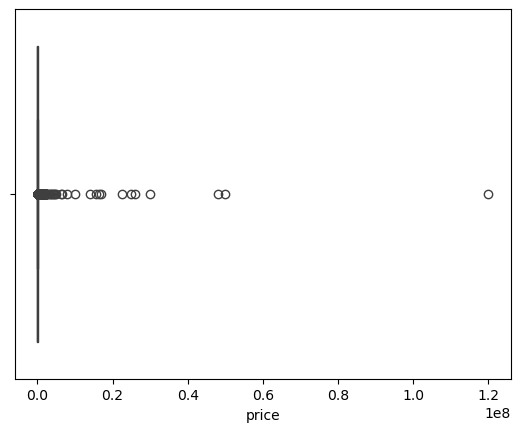

In [17]:
sns.boxplot(df, x = 'price')

Bu görünen grafikte birinci ikinci ve üçüncü çeyrek o kadar birbirine yakın ve fiyat aralıkları birbirine o kadar uzak ki tüm çeyrekler aynı çizgide gösterilmiş. Pek işlevsel bir veri görünmüyor. Veri çok aykırı ve aykırı veri sayısı az görünüyor. Kaç tane var bakalım. Bunun için IQR değerine yani çeyrek açıklığına bakıp 3. Çeyrek + 1.5(IQR) ile 1. Çeyrek - 1.5(IQR) değerine bakacağız.

In [20]:
Q1 = df.price.quantile(.25) #1. Çeyrek

In [22]:
Q3 = df.price.quantile(.5) #3. Çeyrek

In [24]:
IQR = Q3 - Q1

In [26]:
QMin = Q1 - 1.5 * IQR
QMax = Q3 + 1.5 * IQR

In [28]:
len(df[df.price > QMax]) + len(df[df.price < QMin])

2491

8 bin küsür veriden 2500 civarı veri aykırı veri gibi görünüyor. Bu verileri baskıladıktan sonra ve bu haliyle LOF kullanarak diğer tüm columnlerle karşılaştırmalı bir şekilde aykırı veri analizini yapalım. Baskılamadan önce baskılamak için yeni bir df kullanalım.

In [31]:
dfBaski = df.copy()

Şimdi aykırı verileri QMin ve QMax'a uygun olavak şekikde baskılayalım.

In [34]:
dfBaski[df.price < QMin] = QMin
dfBaski[df.price > QMax] = QMax

Şimdi boxplot grafiğimize tekrar bakalım.

<Axes: xlabel='price'>

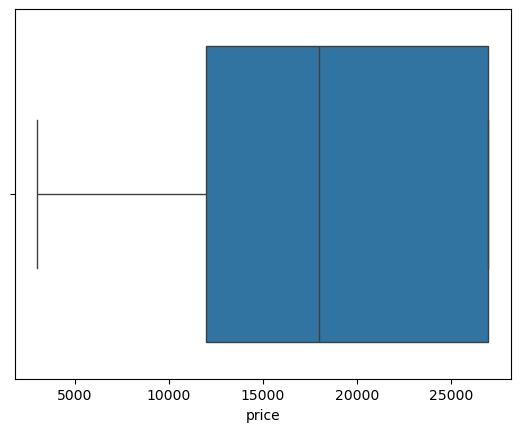

In [37]:
sns.boxplot(x = dfBaski.price)

Üstteki ve alttaki verilere baktığımız da 2500'e yakın veriyi diğer fiyatların yoğun olduğu yerlere baskıladım. Grafikte Birinci, ikinci ve üçüncü çeyrek görünüyor. Aykırı bir veri aşağıdaki ilk haline göre kalmadı.

<Axes: xlabel='price'>

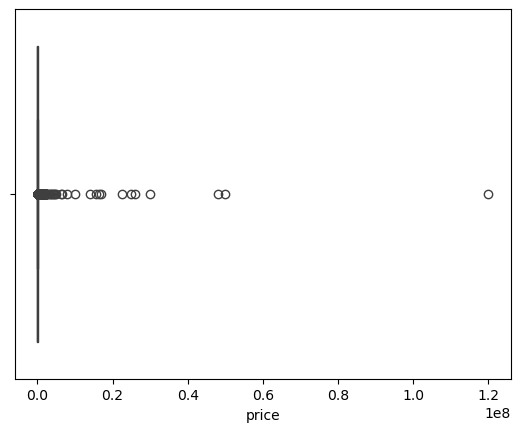

In [40]:
sns.boxplot(x = df.price)

Şimdi her iki veri setine de Local Outlier Factor uygulayalım ve neler olacağına bakalım. Ama önce encoding yaparak kategorik değişkenlerden kurtulalım.

In [43]:
df_int = pd.get_dummies(df, columns = ['city', 'district', 'neighborhood'], drop_first = True)
dfBaski_int = pd.get_dummies(dfBaski, columns = ['city', 'district', 'neighborhood'], drop_first = True)

In [45]:
df_int.head()

,room,living_room,area,age,floor,price,city_aydin,city_denizli,city_izmir,city_kutahya,...,neighborhood_yurdoglu,neighborhood_zafer,neighborhood_zaferler,neighborhood_zafertepe,neighborhood_zeybek,neighborhood_zeytinalani,neighborhood_zeytinkoy,neighborhood_zeytinlik,neighborhood_zubeyde_hanim,neighborhood_zumrut
0,3,1,150,20,-2,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,110,8,1,85,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,60,0,4,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,50,10,5,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,1,300,11,7,165,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Artık kategorik değişken kalmadığına göre işimzie devam edebiliriz.

In [48]:
from sklearn.neighbors import LocalOutlierFactor as LOF

In [50]:
clf = LOF(contamination = .1)
clf.fit_predict(df_int)

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
clfBaski = LOF(contamination = .1)
clfBaski.fit_predict(dfBaski_int)

array([1, 1, 1, ..., 1, 1, 1])

Verisetinin aykırılık oranını inceleyebileceğimiz hale getirdik. Şimdi bir eskisine bir de bakılanmışında çoklu aykırı değer oranlarına bakıldığında nasıl bir şey yapmışız bakalım. Ama aykırı değerlerdeki farkı anlamak için küçükten büyüğe sıralıcaz bunun için de numpy gerekiyor. Import edelim.

In [55]:
df_score = clf.negative_outlier_factor_

In [57]:
import numpy as np
np.sort(df_score)[:100] #ilk 100 değere bakalım.

array([-532.28705127, -518.80939718, -514.65329656, -407.20569727,
       -358.32635584, -346.91233079, -333.42550137, -333.4254992 ,
       -332.29576467, -320.51503765, -306.54787278, -288.17598348,
       -260.36117791, -259.63414008, -237.83030129, -225.35760275,
       -216.44329098, -214.2122978 , -214.2122978 , -210.24345215,
       -207.05495841, -197.49801992, -196.59572676, -191.10848753,
       -190.57015272, -190.20578089, -190.20555658, -190.20515071,
       -185.41734838, -184.40130962, -184.24825825, -184.13867858,
       -179.37826521, -178.23662794, -176.88917946, -174.35721438,
       -169.5020547 , -159.34920994, -157.9973171 , -154.40705122,
       -149.62530086, -148.92850652, -145.70853513, -144.59780637,
       -138.40181337, -137.2038306 , -135.77334447, -134.01079326,
       -131.04572205, -126.4220559 , -126.34332261, -124.1521396 ,
       -121.34303032, -121.05808813, -117.94078035, -117.94078025,
       -117.57356793, -116.52491627, -113.65940062, -112.92954

Tutarlı olmayan hala çok hızlı bir azalış var, burada QMin gibi veya QMax gibi bir eşik değer belirlemek için bakarak karar vermek çok zor. Görselleştirelim.

<Axes: >

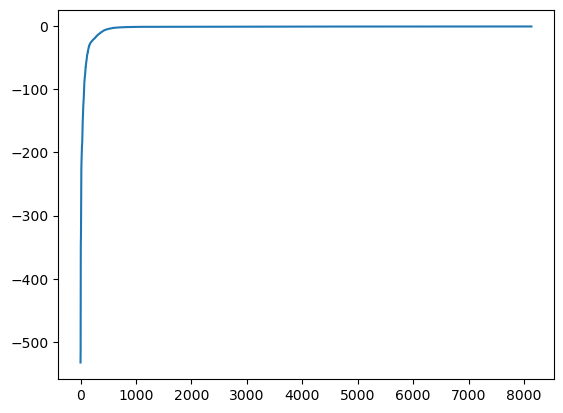

In [60]:
sns.lineplot(np.sort(df_score))

Burada da görüldüğü gibi net karar verilmese de az çok bir fikir sahibi olduk. İlk 200-800 arası bir yer gibi görünüyor. İlk bin veriye bakalım.

<Axes: >

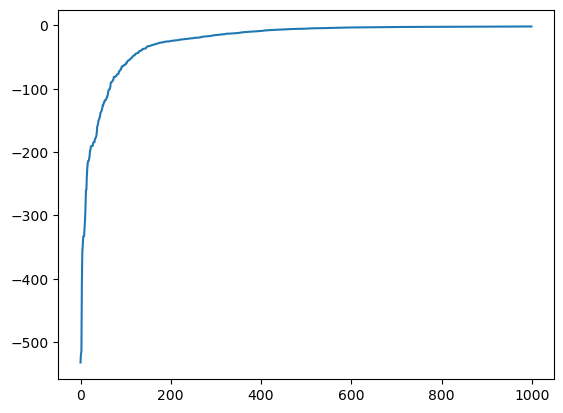

In [63]:
sns.lineplot(np.sort(df_score)[:1000])

Evet görüldüğü gibi eşik değeri net 200 seçersek diğer değerler tutarlı şekilde birbirini takip ediyor.

In [66]:
treshVal = np.sort(df_score)[200]

Bir de diğerine bakalım

In [69]:
dfBaski_score = clfBaski.negative_outlier_factor_
np.sort(dfBaski_score)[:100]

array([-121.01783355,  -38.0416852 ,  -38.04164749,  -36.99519491,
        -36.37001729,  -33.12940569,  -33.02144669,  -31.74834473,
        -31.36391026,  -31.02769517,  -30.35730075,  -29.98140001,
        -29.64390168,  -29.59819486,  -29.01904173,  -28.5780224 ,
        -28.54232311,  -28.43178908,  -28.39216277,  -27.85283402,
        -27.58946741,  -26.93943331,  -26.25823997,  -25.82682962,
        -25.42797891,  -25.42387034,  -25.30932963,  -25.24599333,
        -25.11597597,  -25.09311727,  -25.06524237,  -25.04484152,
        -25.03941328,  -24.28936952,  -24.22936577,  -24.05743103,
        -23.88254743,  -23.61218118,  -22.6784527 ,  -22.62998394,
        -22.58167082,  -22.43306488,  -22.08438478,  -22.0456153 ,
        -21.99797141,  -21.80170118,  -21.74993878,  -21.51232433,
        -21.48262135,  -21.4404988 ,  -21.41732305,  -21.38725603,
        -21.08777299,  -20.88649947,  -20.70618267,  -20.69068832,
        -20.62878103,  -20.34903266,  -20.21703344,  -20.21703

Yani burada bakmaya gerek yok ama emin olmak için veriyi görselleştirerek kontrol edelim.

<Axes: >

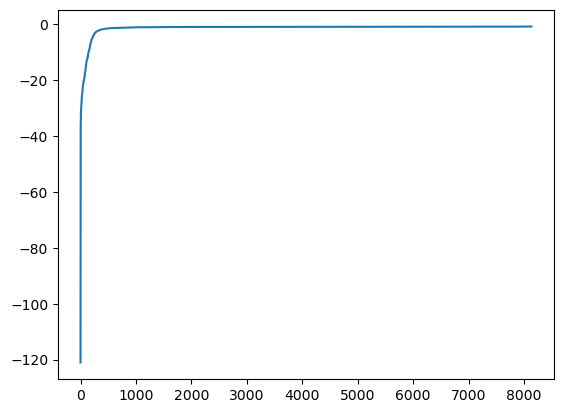

In [72]:
sns.lineplot(np.sort(dfBaski_score))

<Axes: >

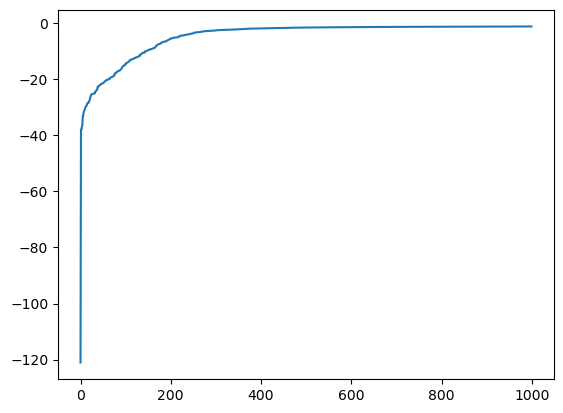

In [74]:
sns.lineplot(np.sort(dfBaski_score)[:1000])

Burada da eşik değerimiz 150-200ler gibi görünüyor alalım. Eğriye göre bakarsak 170 diyebiliriz.

In [77]:
treshBVal = np.sort(dfBaski_score)[170]

Artık aykırı değerleri filtreleyebiliriz.

In [80]:
dfEnc = df_int.copy()
dfBasEnc = dfBaski_int.copy() #isimlendirme pek doğru değildi, düzeltildi

In [82]:
print(len(dfEnc.index))
dfEnc = dfEnc[df_score > treshVal]
print(len(dfEnc.index))

8136
7935


199 veri aykırı değer olarak görüldü ve silindi.

In [85]:
print(len(dfBasEnc.index))
dfBasEnc = dfBasEnc[dfBaski_score > treshBVal]
print(len(dfBasEnc.index))

8136
7965


Burada da 169 veri silindi. Gayet güzel. En son priceların box plotuna bakıp tekrar kıyaslayalım. Baskıladığımız verisetinde daha fazla veri kurtarabildiğimiz için makine öğrenimine baskıladığımız veri ile devam edicez.